In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('data.csv')

In [42]:
data.head(11)

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,...,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby
0,-0.750139,0.344181,-1.959067,0.543107,-0.331916,-1.241278,0.234943,-0.946585,-0.929597,0.451229,...,False,False,False,False,False,False,True,False,False,False
1,-1.625231,-2.039194,-1.959067,0.543107,-1.011937,-0.531615,-0.152988,-1.210911,-1.640938,0.451229,...,True,False,False,False,False,True,False,False,False,False
2,-1.650971,-2.039194,-1.959067,0.543107,-1.011937,-0.815480,-0.152988,-1.210911,-1.640938,0.451229,...,True,False,False,False,False,True,False,False,False,False
3,1.566293,0.344181,-1.959067,0.543107,-0.044330,-0.531615,1.961858,-0.085078,0.137414,-1.272630,...,False,False,False,False,False,False,False,False,True,False
4,0.022005,-1.131242,-1.959067,0.543107,2.505000,-1.241278,0.097290,-0.085078,0.848755,0.451229,...,False,False,False,False,False,False,False,True,False,False
5,-1.775373,-1.244736,-1.959067,0.543107,-1.706937,-0.957413,1.348678,-1.396918,-0.929597,-1.272630,...,False,False,False,False,False,False,False,True,False,False
6,-1.363562,-1.244736,-1.959067,0.543107,-0.841183,-1.383211,0.622873,-1.203568,-0.929597,-2.996489,...,False,False,False,False,False,False,False,True,False,False
7,-1.522283,-1.131242,-1.959067,0.543107,-0.841183,-0.247750,0.097290,-0.085078,0.848755,0.451229,...,False,False,False,False,False,False,False,True,False,False
8,-1.307798,-1.131242,-1.959067,0.543107,-0.841183,-1.241278,0.097290,-0.085078,0.848755,0.451229,...,False,False,False,False,False,False,False,True,False,False
9,-1.316378,-1.244736,-1.959067,0.543107,-0.841183,0.178048,0.622873,-1.203568,-0.929597,-2.996489,...,False,False,False,False,False,False,False,True,False,False


In [28]:
data.shape

(5891, 47)

In [3]:
# # Check for missing values and print summary statistics
print(data.isnull().sum())

SalePrice                             0
YearBuilt                             0
YrSold                                0
MonthSold                             0
Size(sqf)                             0
Floor                                 0
HallwayType                           0
HeatingType                           0
AptManageType                         0
N_Parkinglot(Ground)                  0
N_Parkinglot(Basement)                0
TimeToBusStop                         0
TimeToSubway                          0
N_APT                                 0
N_manager                             0
N_elevators                           0
SubwayStation                         0
N_FacilitiesNearBy(PublicOffice)      0
N_FacilitiesNearBy(Hospital)          0
N_FacilitiesNearBy(Dpartmentstore)    0
N_FacilitiesNearBy(Mall)              0
N_FacilitiesNearBy(ETC)               0
N_FacilitiesNearBy(Park)              0
N_SchoolNearBy(Elementary)            0
N_SchoolNearBy(Middle)                0


In [43]:
data.describe()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
count,5891.000000,5.891000e+03,5.891000e+03,5.891000e+03,5.891000e+03,5891.000000,5.891000e+03,5.891000e+03,5.891000e+03,5.891000e+03,...,5891.0,5.891000e+03,5.891000e+03,5.891000e+03,5.891000e+03,5.891000e+03,5.891000e+03,5.891000e+03,5.891000e+03,5.891000e+03
mean,0.000000,-1.929839e-17,7.719358e-17,-1.929839e-17,-9.649197e-18,0.000000,1.375011e-16,9.649197e-18,-3.859679e-17,-4.824598e-17,...,0.0,-6.754438e-17,-2.412299e-18,-1.085535e-17,2.653529e-17,2.894759e-17,-1.447380e-17,-9.649197e-18,-1.929839e-17,4.824598e-18
std,1.000085,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,...,0.0,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00
min,-1.805398,-2.833653e+00,-1.959067e+00,-1.523335e+00,-2.365988e+00,-1.525144,-1.154098e+00,-1.396918e+00,-1.640938e+00,-2.996489e+00,...,0.0,-8.819108e-01,-9.938531e-01,-3.166503e+00,-1.672819e+00,-1.709169e+00,-1.856564e+00,-2.063643e+00,-2.116283e+00,-2.447919e+00
25%,-0.724400,-1.131242e+00,-9.264508e-01,-9.329233e-01,-8.411830e-01,-0.815480,-1.016445e+00,-9.465848e-01,-9.295970e-01,-1.272630e+00,...,0.0,-8.819108e-01,-9.938531e-01,-1.071151e+00,-5.843966e-01,-1.066458e+00,-5.135275e-01,-7.764245e-01,-5.978401e-01,-8.706806e-01
50%,-0.106683,3.441812e-01,1.061656e-01,-4.730513e-02,-4.433017e-02,-0.105817,9.729003e-02,-8.507790e-02,4.930843e-01,4.512291e-01,...,0.0,-4.276142e-01,5.252929e-01,-2.347534e-02,5.040259e-01,-4.237465e-01,-5.135275e-01,-3.473516e-01,-2.941516e-01,-1.947213e-01
75%,0.665461,5.711693e-01,7.945764e-01,8.383130e-01,5.338375e-01,0.745779,2.349427e-01,5.561574e-01,8.487546e-01,4.512291e-01,...,0.0,1.389572e+00,5.252929e-01,1.024201e+00,5.040259e-01,8.616761e-01,8.295093e-01,5.107941e-01,9.206026e-01,9.318777e-01
max,2.741668,1.365628e+00,1.482987e+00,1.723931e+00,2.505000e+00,3.016702,4.689883e+00,1.836180e+00,2.627106e+00,2.175088e+00,...,0.0,1.389572e+00,2.044439e+00,3.119553e+00,1.592448e+00,1.504387e+00,1.501028e+00,1.798013e+00,1.831668e+00,1.382517e+00


### Hisogrami ucestalosti numerickih atributa

<Figure size 640x480 with 0 Axes>

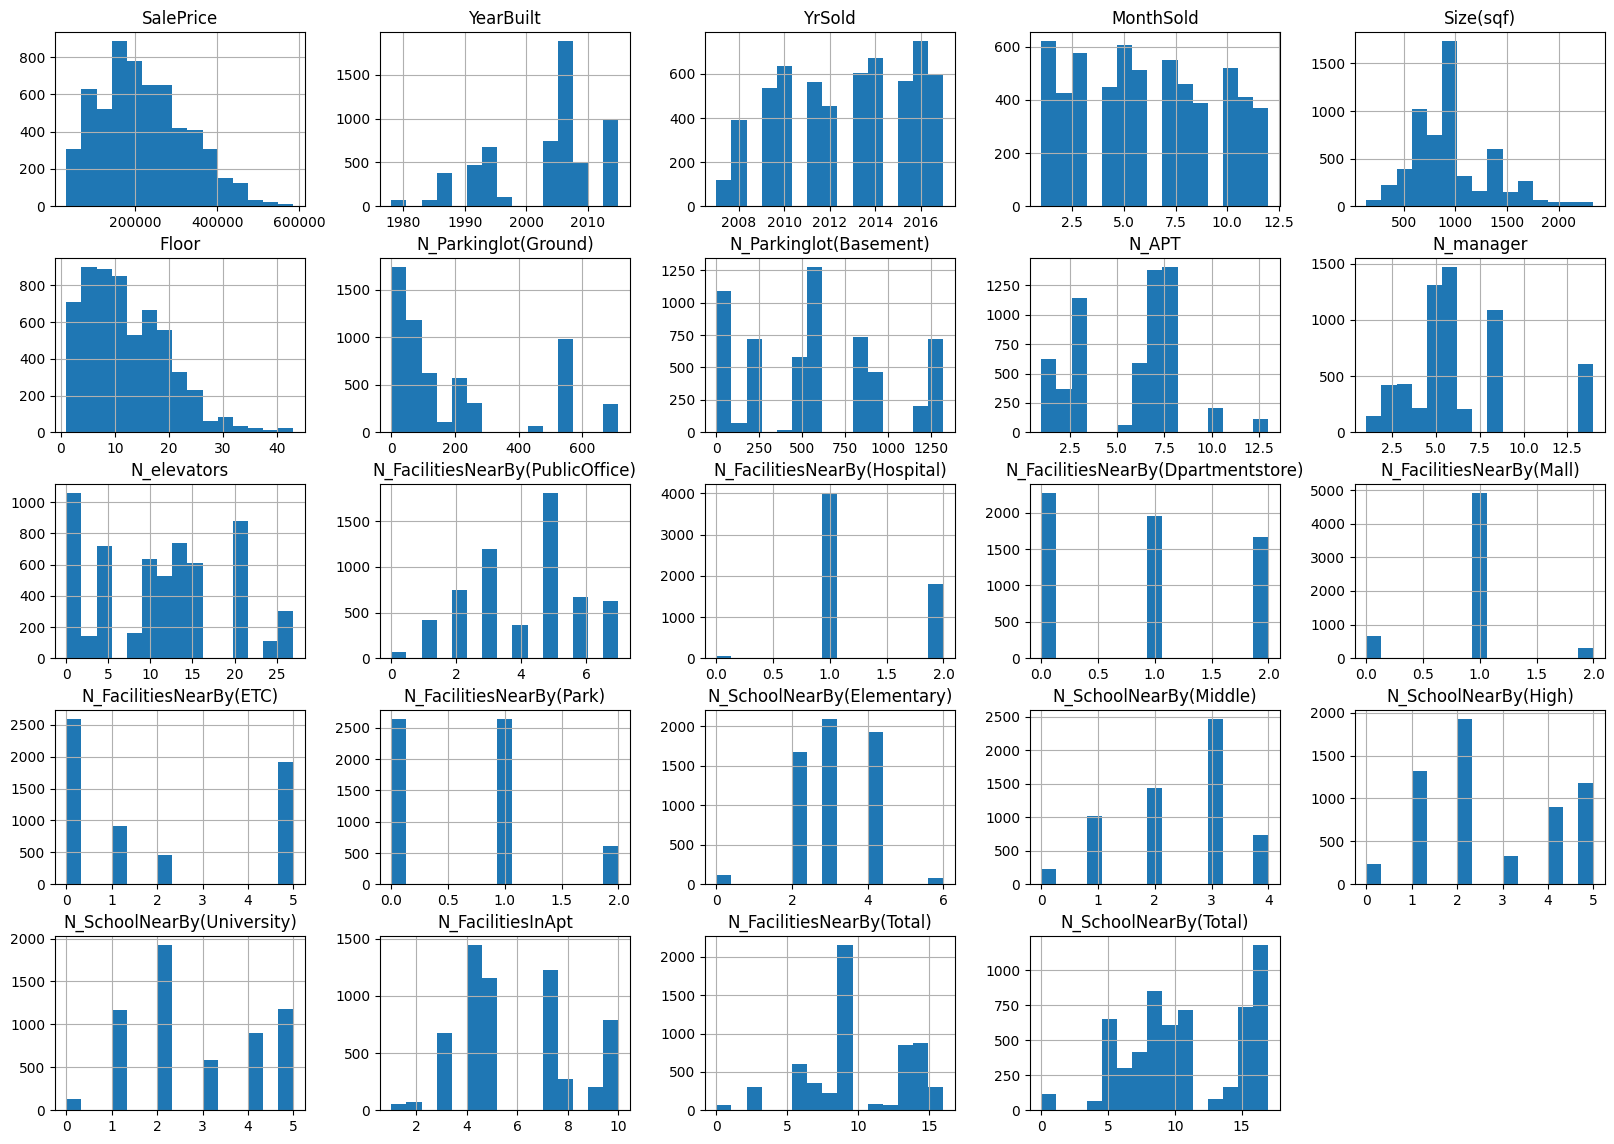

In [8]:
plt.figure()
data.hist(bins=15, figsize=(20, 14))
plt.ylabel('how many')
plt.savefig(f'graphs/numerical_features_histogram.png')
plt.show()

### Boxplot-ovi i cuvanje slika

In [6]:
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.savefig(f'graphs/boxplot_{col}.png')  
    plt.close()  

In [7]:
data = data.dropna()

In [8]:
# Ako negde fali vrednost, stavlja se srednja vrednosti tog atributa
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col] = data[col].fillna(data[col].mean())

In [9]:
# Ako fali objekat, stavlja se najcesca vrednost
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

## Sklairanje i pretprocesiranje


In [10]:
scaler = StandardScaler()

In [18]:

nominal_cols = ['HallwayType', 'HeatingType', 'AptManageType', 'TimeToBusStop', 'TimeToSubway', 'SubwayStation']
data = pd.get_dummies(data, columns=nominal_cols)

## Racunanje Iterkvartalnog raspona

In [19]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
IQR

SalePrice                             1.383508
YearBuilt                             1.702411
YrSold                                1.721027
MonthSold                             1.771236
Size(sqf)                             1.361746
Floor                                 1.561259
N_Parkinglot(Ground)                  1.030276
N_Parkinglot(Basement)                1.502742
N_APT                                 1.778352
N_manager                             0.552668
N_elevators                           1.409250
N_FacilitiesNearBy(PublicOffice)      1.115235
N_FacilitiesNearBy(Hospital)          2.084554
N_FacilitiesNearBy(Dpartmentstore)    2.466411
N_FacilitiesNearBy(Mall)              0.000000
N_FacilitiesNearBy(ETC)               2.271483
N_FacilitiesNearBy(Park)              1.519146
N_SchoolNearBy(Elementary)            2.095352
N_SchoolNearBy(Middle)                1.088423
N_SchoolNearBy(High)                  1.928134
N_SchoolNearBy(University)            1.343037
N_FacilitiesI

In [20]:
# Racunanje granicnih vrednosti
for col in numerical_cols:
    #high outliers
    high = Q3[col] + 1.5 * IQR[col]
    data.loc[data[col] > high, col] = data[col].median()

    #low outliers
    low = Q1[col] - 1.5 * IQR[col]
    data.loc[data[col] < low, col] = data[col].median()

In [21]:
# Skaliranje
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [22]:
# Check for missing values after preprocessing
missing_values_after = data.isnull().sum()
missing_values_after

SalePrice                              0
YearBuilt                              0
YrSold                                 0
MonthSold                              0
Size(sqf)                              0
Floor                                  0
N_Parkinglot(Ground)                   0
N_Parkinglot(Basement)                 0
N_APT                                  0
N_manager                              0
N_elevators                            0
N_FacilitiesNearBy(PublicOffice)       0
N_FacilitiesNearBy(Hospital)           0
N_FacilitiesNearBy(Dpartmentstore)     0
N_FacilitiesNearBy(Mall)               0
N_FacilitiesNearBy(ETC)                0
N_FacilitiesNearBy(Park)               0
N_SchoolNearBy(Elementary)             0
N_SchoolNearBy(Middle)                 0
N_SchoolNearBy(High)                   0
N_SchoolNearBy(University)             0
N_FacilitiesInApt                      0
N_FacilitiesNearBy(Total)              0
N_SchoolNearBy(Total)                  0
HallwayType_corr

In [23]:
data.to_csv('processed_data.csv', index=False)

## Toplotna mapa

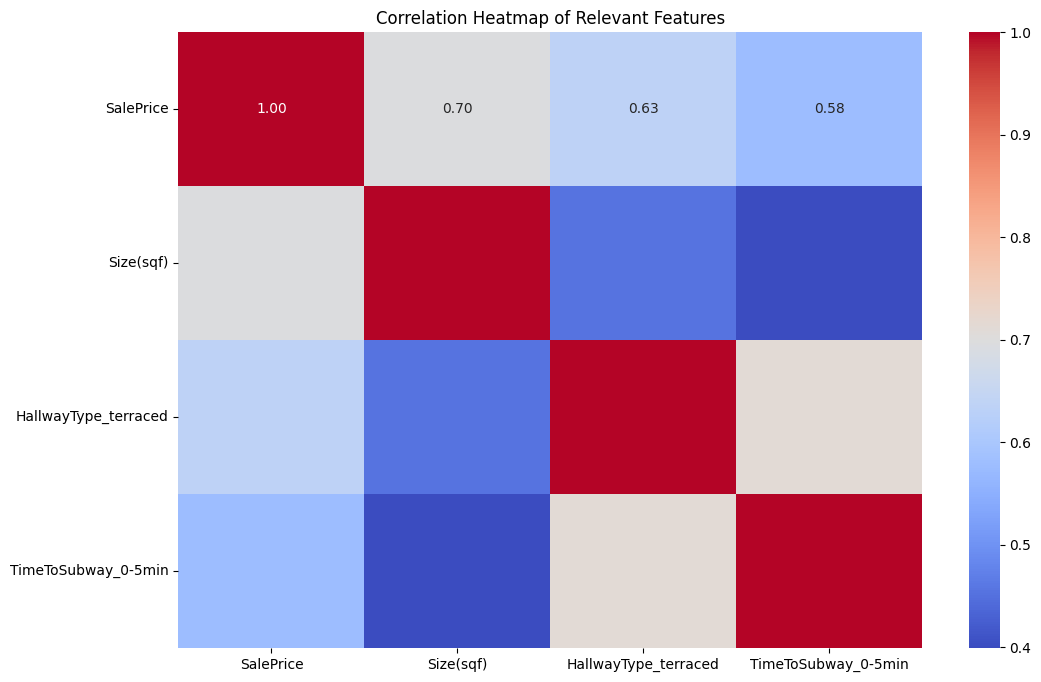

In [24]:
correlation_matrix = data.corr() # Pearson Correlation

relevant_features = correlation_matrix.index[abs(correlation_matrix["SalePrice"]) > 0.5]

plt.figure(figsize=(12, 8))
sns.heatmap(data[relevant_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Relevant Features')
plt.savefig('graphs/correlation_heatmap_relevant_features.png')